# ADALINE

In [308]:
import numpy as np

class Adaline:
    def __init__(self, learning_rate=0.01, n_iterations=100, random_state = 69):
        self.learning_rate = learning_rate
        self.n_iterations = n_iterations
        self.weights = None
        self.mse_error = []
        self.rgen = np.random.RandomState(seed=random_state)
        
    def net_input(self, X):
        return X @ self.weights
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)    
    
    def fit_mini_batch_sgd(self, X, y, batch_size = 32):
      n_samples, n_features = X.shape
      self.weights = self.rgen.randn(n_features)
      
      for _ in range(self.n_iterations):
        indices = self.rgen.permutation(n_samples)
        for start in range(0, n_samples, batch_size):
          end = start + batch_size
          X_batch_indices = indices[start:end]
          y_batch_indices = indices[start:end]
          X_batch = X[X_batch_indices]
          y_batch = y[y_batch_indices]
          
          output = self.net_input(X_batch)
          if all(output * y_batch > 0):
            return self.weights
          error = y_batch - output
          gradient = 2 * error
          self.weights += self.learning_rate * X_batch.T @ gradient
          self.mse_error.append((error**2).sum()/len(y_batch))
      
      
    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = self.rgen.randn(n_features)
        
        for _ in range(self.n_iterations):
            output = self.net_input(X)
            error = y - output
            if all(output * y > 0):
                break
            gradient = 2 * error
            self.weights += self.learning_rate * X.T @ gradient
            self.mse_error.append((error**2).sum()/len(y))
    
    def predict(self, X):
        linear_output = np.dot(X, self.weights)
        return np.where(linear_output >= 0, 1, -1)

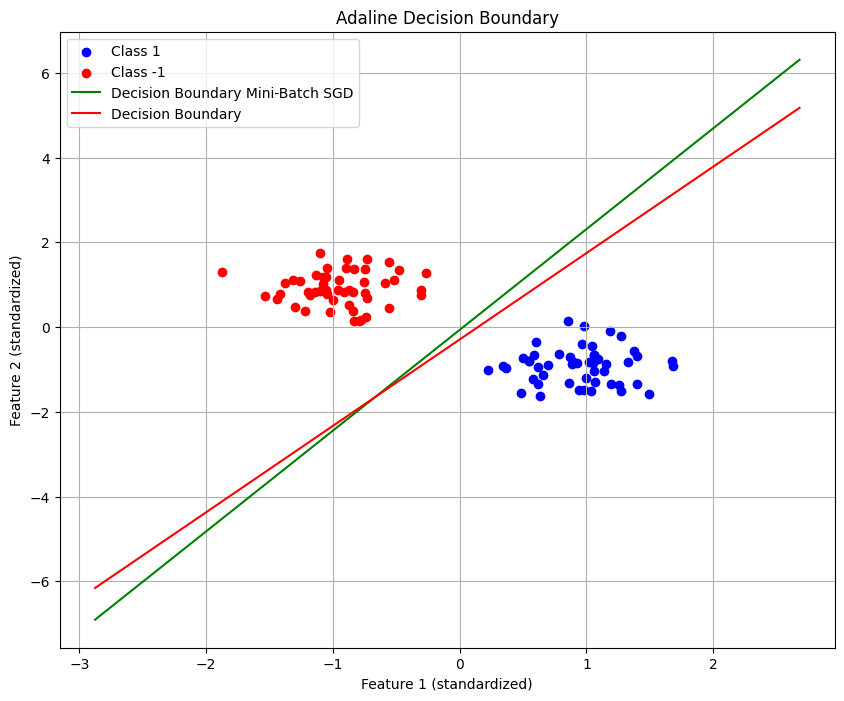

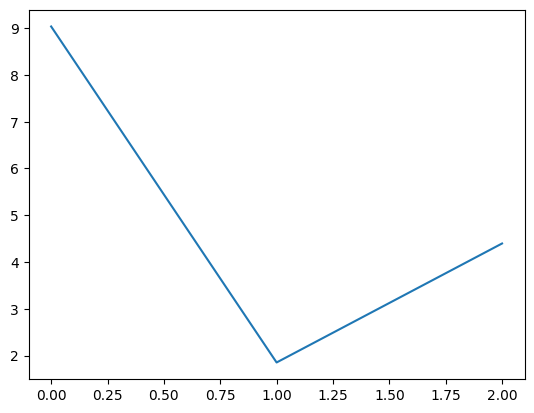

In [309]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
# Generate two blobs of points
X, y = make_blobs(n_samples=100, n_features=2, centers=2, cluster_std=1.5, random_state=42)
y = np.where(y == 0, -1, 1)  # Convert labels to -1 and 1

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Add bias term to X
X_with_bias = np.c_[np.ones((X_scaled.shape[0], 1)), X_scaled]

# Fit Adaline model
adaline = Adaline(learning_rate=0.01, n_iterations=1000)
adaline.fit_mini_batch_sgd(X_with_bias, y)

# Plot the points
plt.figure(figsize=(10, 8))
plt.scatter(X_scaled[y == 1][:, 0], X_scaled[y == 1][:, 1], color='blue', label='Class 1')
plt.scatter(X_scaled[y == -1][:, 0], X_scaled[y == -1][:, 1], color='red', label='Class -1')

# Plot the decision boundary
weights = adaline.weights
slope = -weights[1] / weights[2]
intercept = -weights[0] / weights[2]

x_vals = np.array([X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1])
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, 'g-', label='Decision Boundary Mini-Batch SGD')

adaline.fit(X_with_bias, y)

weights = adaline.weights
slope = -weights[1] / weights[2]
intercept = -weights[0] / weights[2]

x_vals = np.array([X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1])
y_vals = slope * x_vals + intercept

plt.plot(x_vals, y_vals, 'r-', label='Decision Boundary')

plt.xlabel('Feature 1 (standardized)')
plt.ylabel('Feature 2 (standardized)')
plt.title('Adaline Decision Boundary')
plt.legend()
plt.grid(True)
plt.show()


mse_error = adaline.mse_error


plt.plot(range(len(mse_error)), mse_error)